# **EDA**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17947 entries, 0 to 17946
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_Code  17947 non-null  object
 1   Warehouse     17947 non-null  object
 2   Month         17947 non-null  int64 
 3   Order_Demand  17947 non-null  int64 
 4   Product_Name  17947 non-null  object
dtypes: int64(2), object(3)
memory usage: 701.2+ KB


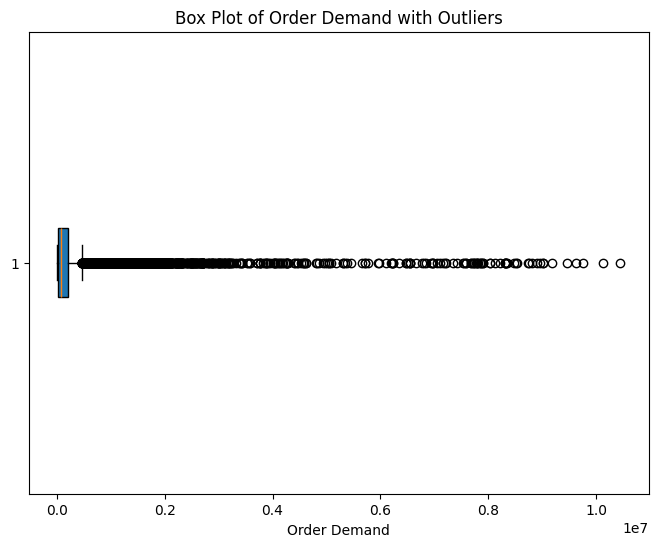

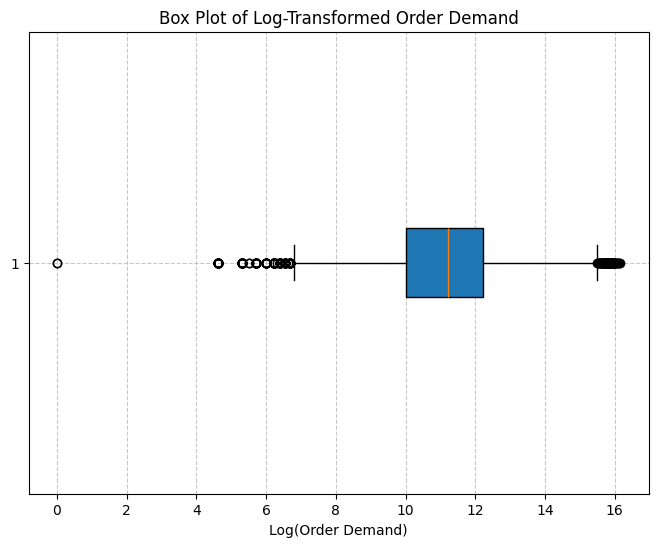


Exploratory Data Analysis (EDA) Summary (After Cleaning)

1. Data Quality
- Missing Values: {'Product_Code': 0, 'Warehouse': 0, 'Month': 0, 'Order_Demand': 0, 'Product_Name': 0}
- Data Types: {'Product_Code': dtype('O'), 'Warehouse': dtype('O'), 'Month': dtype('int64'), 'Order_Demand': dtype('int64'), 'Product_Name': dtype('O'), 'Outlier_Flag': dtype('int64'), 'Log_Order_Demand': dtype('float64')}

2. Descriptive Statistics (Cleaned Data)
- `Month`: Min = 1.0, Max = 61
- `Order_Demand`: Min = 0.0, Max = 10450000.0
   Mean = 255703.62, Median = 75000.00, Std = 670078.37

3. Unique Values (Cleaned Data)
- Warehouses: 4 unique locations
- Product Names: 160 unique names




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/final_food.csv'
data = pd.read_csv(file_path)

# Initial Data Overview
data.info()
data.head()

# Exploratory Data Analysis (EDA)
# 1. Check for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

# 2. Descriptive statistics for numerical columns
descriptive_stats = data.describe()

# 3. Validate the range of 'Month'
month_range = (data['Month'].min(), data['Month'].max())

# 4. Unique counts for categorical columns
unique_counts = {
    "Unique Warehouses": data['Warehouse'].nunique(),
    "Unique Product_Names": data['Product_Name'].nunique(),
}

# 5: Outlier Detection
# Marking outliers in Order_Demand using IQR method
Q1 = data['Order_Demand'].quantile(0.25)
Q3 = data['Order_Demand'].quantile(0.75)
IQR = Q3 - Q1
data['Outlier_Flag'] = ((data['Order_Demand'] < (Q1 - 1.5 * IQR)) |
                                  (data['Order_Demand'] > (Q3 + 1.5 * IQR))).astype(int)


#box plot to analyze outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(data['Order_Demand'], vert=False, patch_artist=True)
plt.title('Box Plot of Order Demand with Outliers')
plt.xlabel('Order Demand')
plt.show()

# Apply log transformation to Order_Demand for clearer visualization
data['Log_Order_Demand'] = np.log1p(data['Order_Demand'])  # Use log1p to handle zero values

# Create the box plot for the log-transformed data
plt.figure(figsize=(8, 6))
plt.boxplot(data['Log_Order_Demand'], vert=False, patch_artist=True)
plt.title('Box Plot of Log-Transformed Order Demand')
plt.xlabel('Log(Order Demand)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Recalculate statistics after cleaning
cleaned_descriptive_stats = data.describe()
cleaned_unique_counts = {
    "Unique Warehouses": data['Warehouse'].nunique(),
    "Unique Product_Names": data['Product_Name'].nunique(),
}
cleaned_month_range = (data['Month'].min(), data['Month'].max())

# Summarize EDA Results
eda_summary = f"""
Exploratory Data Analysis (EDA) Summary (After Cleaning)

1. Data Quality
- Missing Values: {missing_values.to_dict()}
- Data Types: {data.dtypes.to_dict()}

2. Descriptive Statistics (Cleaned Data)
- `Month`: Min = {cleaned_descriptive_stats['Month']['min']}, Max = {cleaned_month_range[1]}
- `Order_Demand`: Min = {cleaned_descriptive_stats['Order_Demand']['min']}, Max = {cleaned_descriptive_stats['Order_Demand']['max']}
   Mean = {cleaned_descriptive_stats['Order_Demand']['mean']:.2f}, Median = {cleaned_descriptive_stats['Order_Demand']['50%']:.2f}, Std = {cleaned_descriptive_stats['Order_Demand']['std']:.2f}

3. Unique Values (Cleaned Data)
- Warehouses: {cleaned_unique_counts["Unique Warehouses"]} unique locations
- Product Names: {cleaned_unique_counts["Unique Product_Names"]} unique names

"""
print(eda_summary)



# **DATA CLEANING**

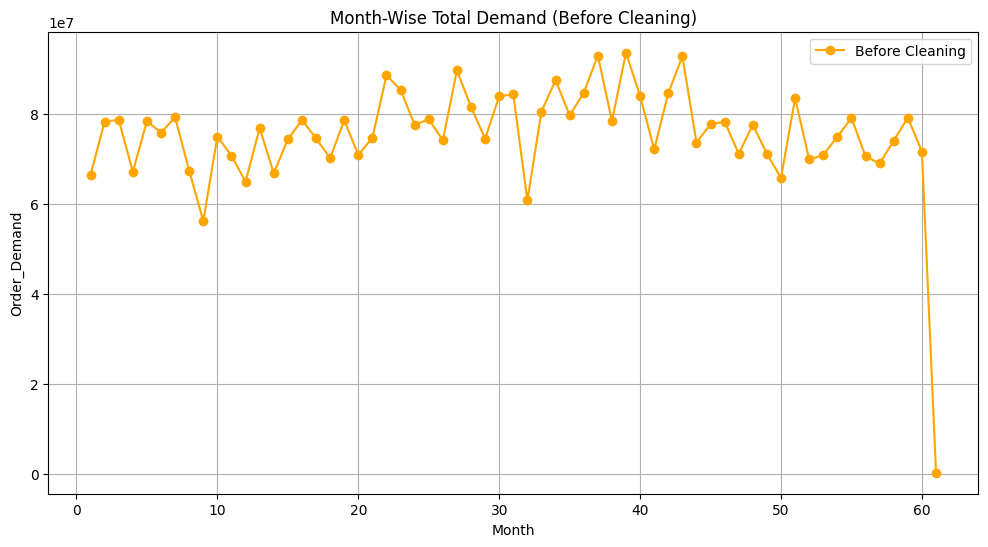

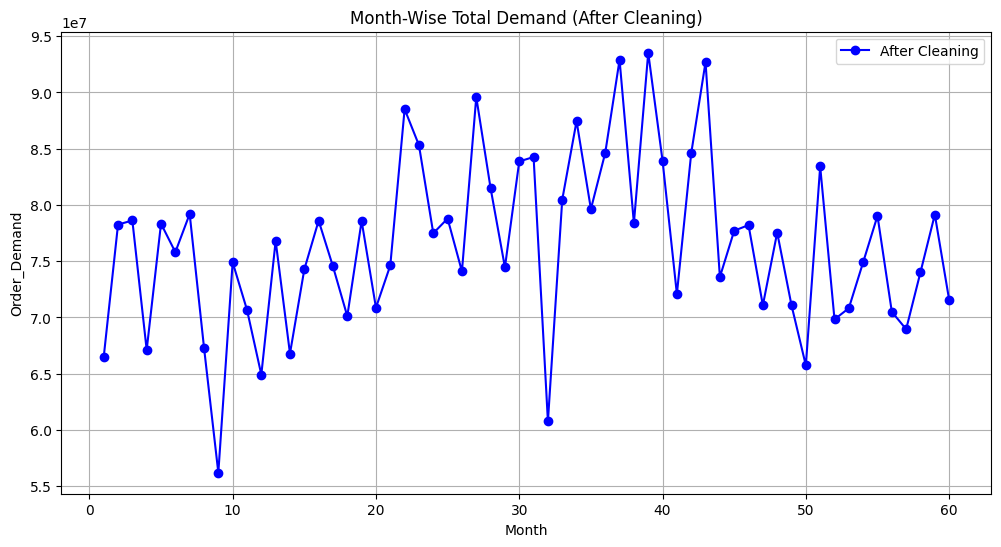

In [ ]:
# Data Cleaning: Remove rows where 'Month' > 60
data_cleaned = data[data['Month'] <= 60]

# Recalculate statistics after cleaning
cleaned_descriptive_stats = data_cleaned.describe()
cleaned_unique_counts = {
    "Unique Warehouses": data_cleaned['Warehouse'].nunique(),
    "Unique Product_Names": data_cleaned['Product_Name'].nunique(),
}
cleaned_month_range = (data_cleaned['Month'].min(), data_cleaned['Month'].max())

# Visualization Functions
def plot_histogram(data, column, title, color, log_scale=False):
    """Plot histogram for a given column."""
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=50, edgecolor='black', color=color)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    if log_scale:
        plt.yscale('log')
    plt.show()

def plot_line(data, x, y, title, color, label):
    """Plot a line chart for given x and y data."""
    plt.figure(figsize=(12, 6))
    plt.plot(data[x], data[y], marker='o', color=color, label=label)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.legend()
    plt.show()

# Visualizations

# Month-wise Total Demand
# Before Cleaning
month_demand_original = data.groupby('Month')['Order_Demand'].sum().reset_index()
plot_line(
    month_demand_original,
    'Month',
    'Order_Demand',
    'Month-Wise Total Demand (Before Cleaning)',
    'orange',
    'Before Cleaning'
)

# After Cleaning
month_demand_cleaned = data_cleaned.groupby('Month')['Order_Demand'].sum().reset_index()
plot_line(
    month_demand_cleaned,
    'Month',
    'Order_Demand',
    'Month-Wise Total Demand (After Cleaning)',
    'blue',
    'After Cleaning'
)


# **VIZ**

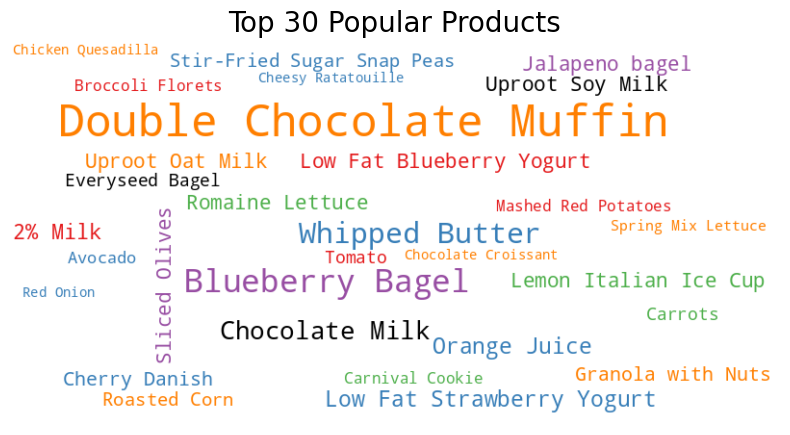

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# Load the dataset

viz_data = data
'''
# Group the data by Product_Name and sum the Order_Demand to get the top 10 items with the highest order demand
top_10_items = viz_data.groupby('Product_Name')['Order_Demand'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 items based on Order Demand
plt.figure(figsize=(10, 6))
top_10_items.plot(kind='barh', color='skyblue')
plt.title('Top 10 Items with Highest Order Demand')
plt.xlabel('Order Demand')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
'''


# Group the data by Product_Code and Product_Name and sum the Order_Demand
top_products = viz_data.groupby(['Product_Code', 'Product_Name'])['Order_Demand'].sum().reset_index()

# Sort by Order_Demand in descending order and select the top 30 products
top_30_products = top_products.sort_values(by='Order_Demand', ascending=False).head(30)

# Prepare the data for the word cloud (dictionary with Product_Name as key and Order_Demand as value)
wordcloud_data = dict(zip(top_30_products['Product_Name'], top_30_products['Order_Demand']))

# Custom color function for more vibrant colors
def vibrant_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = [
        "rgb(228,26,28)",  # Strong red
        "rgb(55,126,184)",  # Strong blue
        "rgb(77,175,74)",   # Strong green
        "rgb(152,78,163)",  # Strong purple
        "rgb(255,127,0)",   # Vibrant orange
        "rgb(0,0,0)"   # Black
    ]
    return random.choice(colors)

# Generate the word cloud with a vibrant color scheme
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(wordcloud_data)

# Apply the custom color function
wordcloud = wordcloud.recolor(color_func=vibrant_color_func)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 30 Popular Products", fontsize=20)
plt.show()



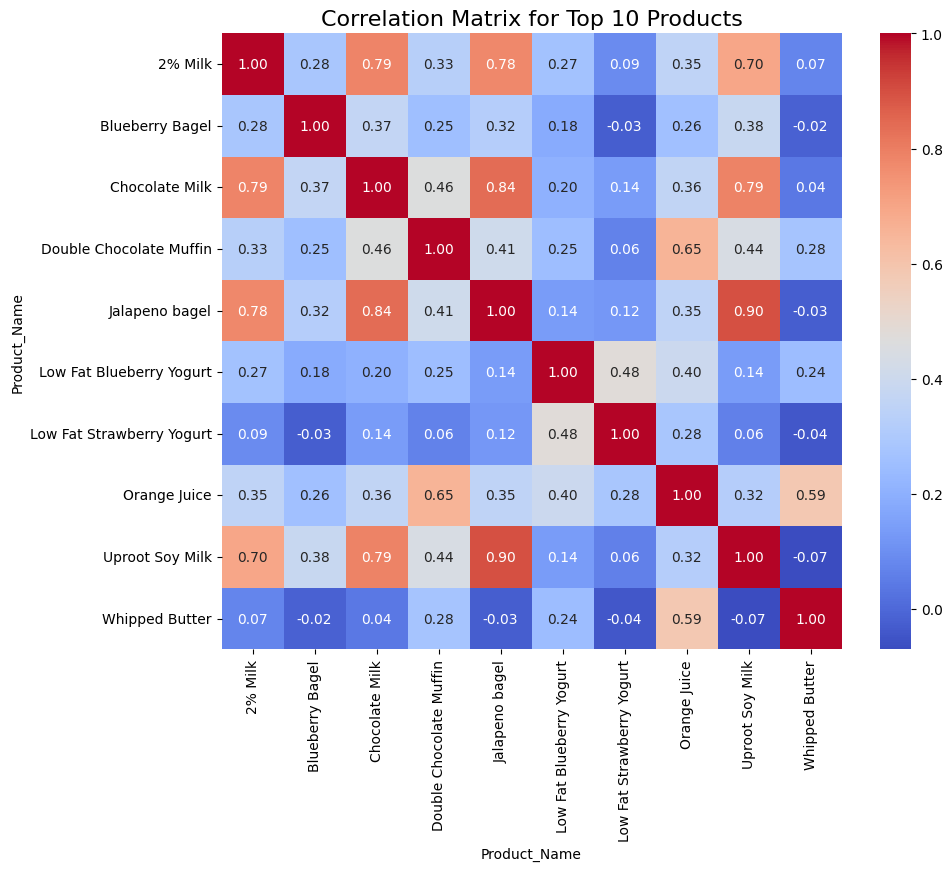

In [ ]:
#correlation matrix
product_demand = data.groupby('Product_Name')['Order_Demand'].sum().sort_values(ascending=False)

# Step 2: Select the top 10 products based on total Order_Demand
top_10_products = product_demand.head(10).index

# Step 3: Filter data for the top 10 products
top_10_data = data[data['Product_Name'].isin(top_10_products)]

# Step 4: Create a pivot table with months as rows and products as columns
pivot_table = top_10_data.pivot_table(index='Month', columns='Product_Name', values='Order_Demand', aggfunc='sum').fillna(0)

# Step 5: Calculate the correlation matrix
correlation_matrix = pivot_table.corr()

# Step 6: Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Top 10 Products", fontsize=16)
plt.show()


<Figure size 1200x600 with 0 Axes>

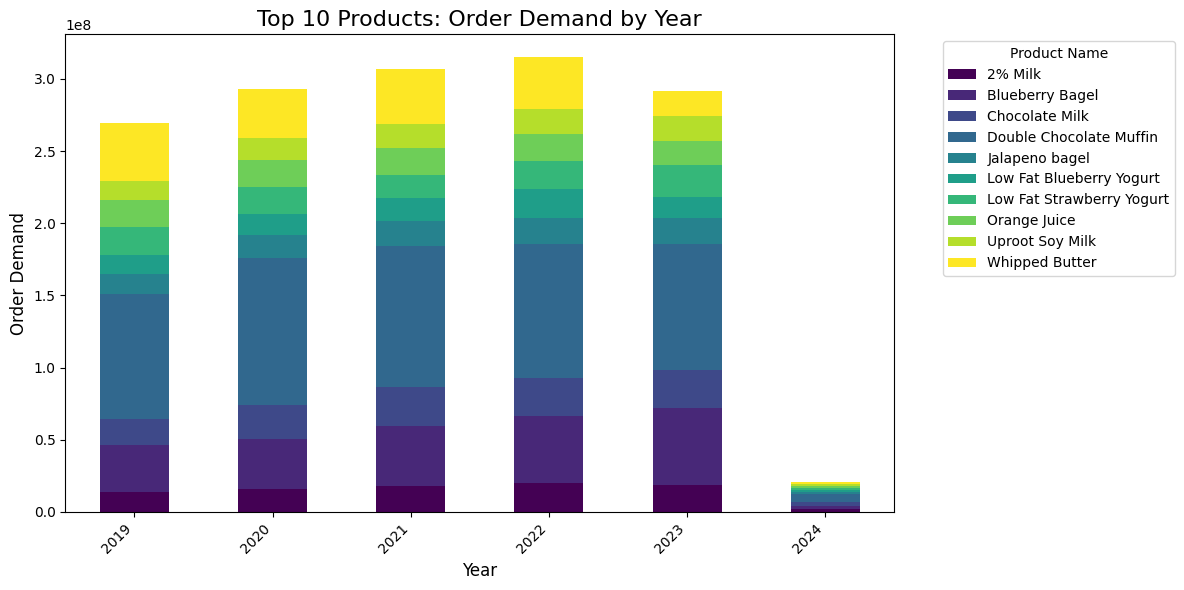

In [ ]:
def map_month_to_date(month):
    start_year = 2019
    start_month = 1  # January 2019
    exact_month = (start_month + month - 1) % 12 or 12
    exact_year = start_year + (start_month + month - 1) // 12
    return f"{exact_year}-{exact_month:02d}"  # Format YYYY-MM

# Apply the function to map months to exact dates
viz_data['Mapped_Date'] = viz_data['Month'].apply(map_month_to_date)

viz_data['Year'] = viz_data['Mapped_Date'].apply(lambda x: int(x.split('-')[0]))
# Filter data for top 10 products by total order demand
top_10_products = viz_data.groupby('Product_Name')['Order_Demand'].sum().nlargest(10).index
viz_data_top_10 = viz_data[viz_data['Product_Name'].isin(top_10_products)]

# Generate a stacked bar chart for Order Demand grouped by Year and Product_Name (top 10 products only)
grouped_data_top_10 = viz_data_top_10.groupby(['Year', 'Product_Name'])['Order_Demand'].sum().unstack()

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
grouped_data_top_10.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Add labels and title
plt.title("Top 10 Products: Order Demand by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Order Demand", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()


# **DATA PREPROCESSING**

---



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Use the cleaned dataset
data_cleaned = data[data['Month'] <= 60]  # Ensure data_cleaned is used if coming from previous cleaning

# Copy data for preprocessing
processed_data = data_cleaned.copy()

# Step 1: Handle Categorical Data
# Apply Label Encoding only for Product_Code and Warehouse
label_encoders = {}
for col in ['Product_Code', 'Warehouse']:
    le = LabelEncoder()
    processed_data[col] = le.fit_transform(processed_data[col])
    label_encoders[col] = le

# Leave Product_Name unchanged
processed_data['Product_Name'] = data_cleaned['Product_Name']

# Step 2: Standardize/Normalize Numeric Columns
scaler = StandardScaler()
processed_data['Order_Demand_Scaled'] = scaler.fit_transform(processed_data[['Order_Demand']])

# Step 3: Handle Temporal Data
# Encode Month with sine and cosine transformations to preserve cyclic nature
processed_data['Month_Sin'] = np.sin(2 * np.pi * processed_data['Month'] / 12)
processed_data['Month_Cos'] = np.cos(2 * np.pi * processed_data['Month'] / 12)

# Step 4: Feature Engineering
# Group by Product_Name to calculate aggregated statistics for Order_Demand
aggregated_stats = processed_data.groupby('Product_Name')['Order_Demand'].agg(['mean', 'median']).reset_index()
aggregated_stats.rename(columns={'mean': 'Demand_Mean', 'median': 'Demand_Median'}, inplace=True)

# Merge aggregated stats back to the processed_data
processed_data = processed_data.merge(aggregated_stats, on='Product_Name', how='left')

# **EXP SMOOTHENING**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


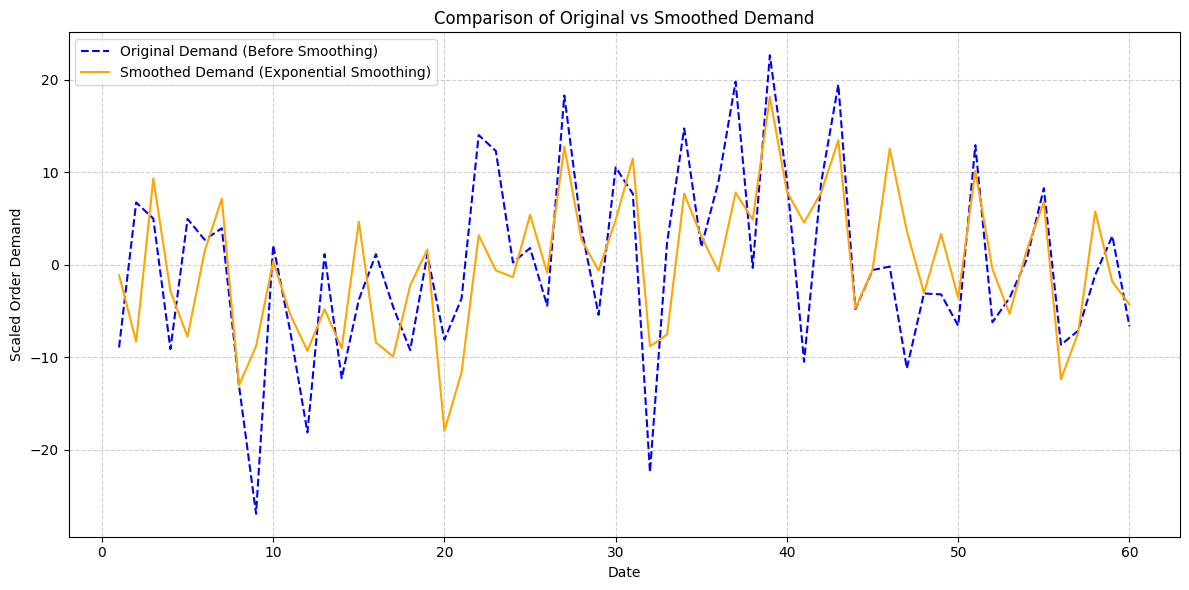

Processed dataset saved as 'processed_final_food_cleaned.csv'


In [ ]:
# Step 6: Smooth the Scaled Demand Data
# Aggregate scaled data by month for smoothing
data_grouped = processed_data.groupby('Month')['Order_Demand_Scaled'].sum()

# Apply Exponential Smoothing
exp_smoothing_model = ExponentialSmoothing(data_grouped, trend='add', seasonal='add', seasonal_periods=12)
exp_smoothing_fit = exp_smoothing_model.fit(optimized=True)
data_smoothed = exp_smoothing_fit.fittedvalues

# Visualization: Before and After Smoothing
plt.figure(figsize=(12, 6))
plt.plot(data_grouped, label='Original Demand (Before Smoothing)', linestyle='--', color='blue')
plt.plot(data_smoothed, label='Smoothed Demand (Exponential Smoothing)', color='orange')
plt.title('Comparison of Original vs Smoothed Demand')
plt.xlabel('Date')
plt.ylabel('Scaled Order Demand')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Save the processed data
processed_data.to_csv('processed_final_food_cleaned.csv', index=False)
print("Processed dataset saved as 'processed_final_food_cleaned.csv'")


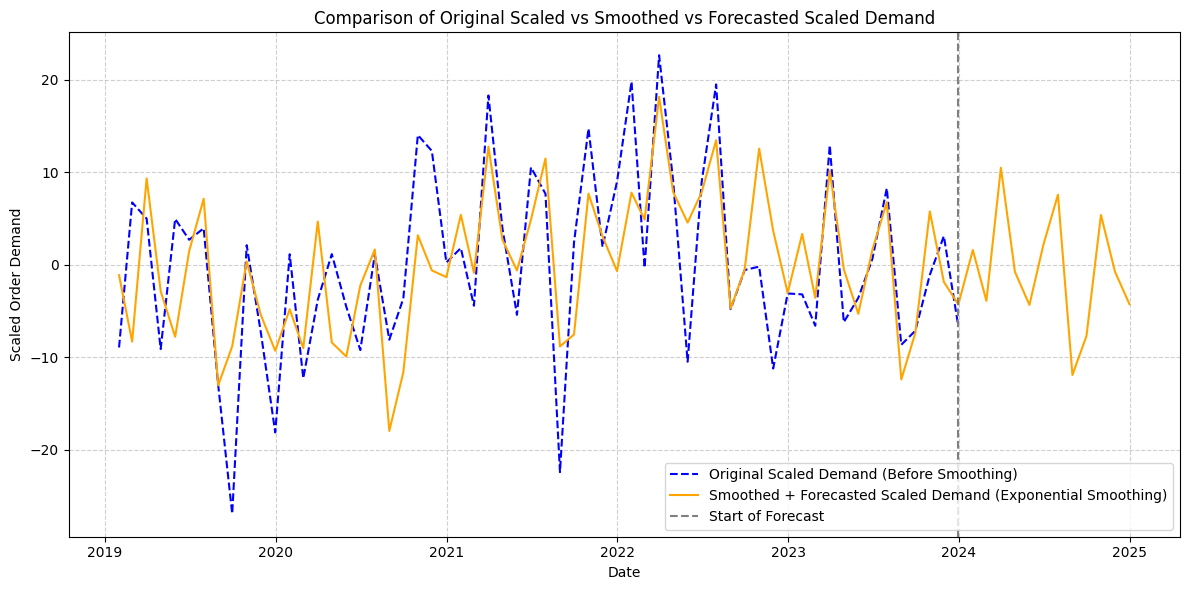

Processed dataset saved as 'processed_final_food_scaled.csv'


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'data_cleaned' is already loaded and processed

# Step 1: Aggregate scaled demand by month
data_grouped = processed_data.groupby('Month')['Order_Demand_Scaled'].sum()

# Step 2: Ensure data_grouped has a datetime index
data_grouped.index = pd.date_range(start='2019-01-01', periods=len(data_grouped), freq='ME')

# Step 3: Apply Exponential Smoothing
exp_smoothing_model = ExponentialSmoothing(data_grouped, trend='add', seasonal='add', seasonal_periods=12)
exp_smoothing_fit = exp_smoothing_model.fit(optimized=True)
data_smoothed = exp_smoothing_fit.fittedvalues

# Step 4: Predict the next 12 months
forecast_months = 12
forecast = exp_smoothing_fit.forecast(forecast_months)

# Step 5: Define forecast time index to align with the smoothed data
last_smoothed_date = data_smoothed.index[-1]
forecast_dates = pd.date_range(
    start=last_smoothed_date + pd.DateOffset(months=1),
    periods=forecast_months,
    freq='ME'
)

# Step 6: Combine smoothed and forecasted values for seamless visualization
smoothed_and_forecast = pd.concat(
    [data_smoothed, pd.Series(forecast, index=forecast_dates)]
)

# Step 7: Visualization - Scaled Original, Smoothed, and Forecasted Demand
plt.figure(figsize=(12, 6))
plt.plot(data_grouped, label='Original Scaled Demand (Before Smoothing)', linestyle='--', color='blue')
plt.plot(smoothed_and_forecast, label='Smoothed + Forecasted Scaled Demand (Exponential Smoothing)', color='orange')
plt.axvline(last_smoothed_date, color='grey', linestyle='--', label='Start of Forecast')
plt.title('Comparison of Original Scaled vs Smoothed vs Forecasted Scaled Demand')
plt.xlabel('Date')
plt.ylabel('Scaled Order Demand')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Save the processed data
processed_data.to_csv('processed_final_food_scaled.csv', index=False)
print("Processed dataset saved as 'processed_final_food_scaled.csv'")


# **ARIMA**

In [ ]:
pip install pmdarima

ADF Statistic: -1.0243108052830074
p-value: 0.7442945570306896
Data is not stationary; trends and patterns vary over time.
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=4.50 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=313.382, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=223.255, Time=1.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.86 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=311.911, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=227.889, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=221.438, Time=2.37 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=12.21 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.01 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=223.303, Time=5.69 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=223.175, Time=3.52 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=239.440, Time=3.90

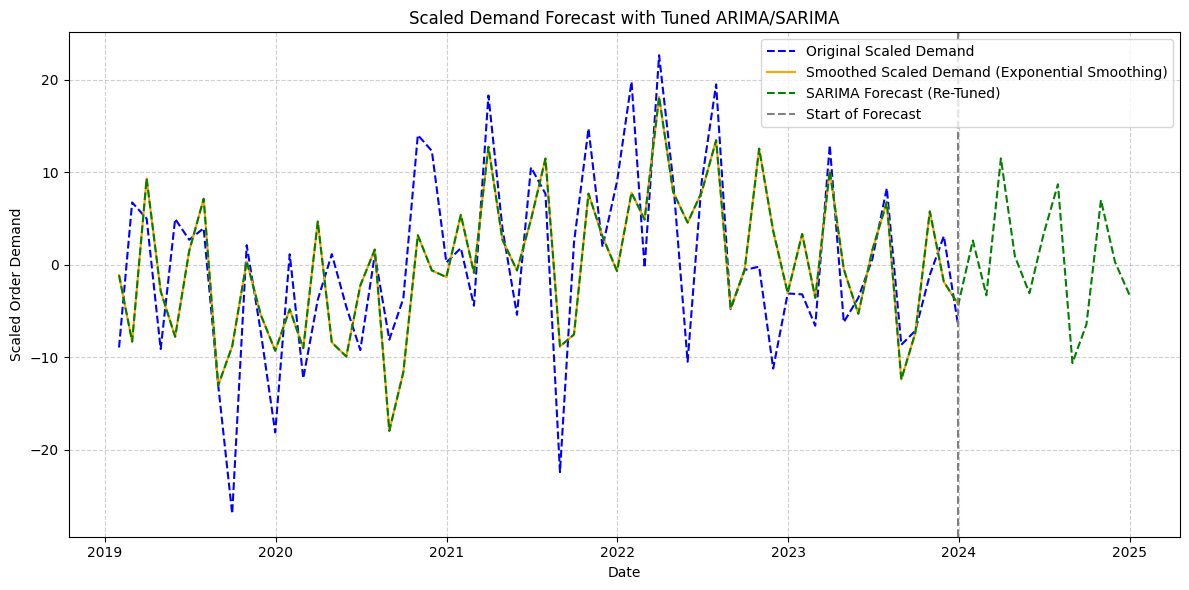

SARIMA forecast saved as 'sarima_forecast_scaled.csv'.


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Ensure data_grouped is available from the cleaned dataset
data_grouped = processed_data.groupby('Month')['Order_Demand_Scaled'].sum()

# Assign a datetime index for proper analysis
data_grouped.index = pd.date_range(start='2019-01-01', periods=len(data_grouped), freq='ME')

# Step 1: Recheck Stationarity on Smoothed Data
adf_test = adfuller(data_smoothed)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] > 0.05:
    print("Data is not stationary; trends and patterns vary over time.")

# # Step 2: Plot ACF and PACF to Fine-Tune Parameters
# plt.figure(figsize=(12, 6))
# plot_acf(data_smoothed, lags=20, ax=plt.subplot(121))
# plot_pacf(data_smoothed, lags=20, ax=plt.subplot(122))
# plt.tight_layout()
# plt.show()

# Step 3: Re-tune Parameters with auto_arima
auto_arima_model = auto_arima(data_smoothed,
                              seasonal=True,
                              m=12,  # Monthly seasonality
                              trace=True,
                              stepwise=True,
                              suppress_warnings=True)
print(f"Optimal ARIMA Order: {auto_arima_model.order}")
print(f"Optimal Seasonal Order: {auto_arima_model.seasonal_order}")

# Step 4: Fit the Re-tuned ARIMA/SARIMA Model
p, d, q = auto_arima_model.order
P, D, Q, s = auto_arima_model.seasonal_order
sarima_model = ARIMA(data_smoothed, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_model_fit = sarima_model.fit()

# Step 5: Forecast the Next 12 Months
forecast_steps = 12
forecast_start_date = data_smoothed.index[-1] + pd.DateOffset(months=1)
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='ME')
sarima_forecast = sarima_model_fit.forecast(steps=forecast_steps)

# Step 6: Combine Smoothed and Forecasted Data
combined_data = pd.concat([data_smoothed, pd.Series(sarima_forecast, index=forecast_dates)])

# Step 7: Visualization
plt.figure(figsize=(12, 6))
plt.plot(data_grouped, label='Original Scaled Demand', linestyle='--', color='blue')
plt.plot(data_smoothed, label='Smoothed Scaled Demand (Exponential Smoothing)', color='orange')
plt.plot(combined_data, label='SARIMA Forecast (Re-Tuned)', linestyle='--', color='green')
plt.axvline(data_smoothed.index[-1], color='grey', linestyle='--', label='Start of Forecast')
plt.title('Scaled Demand Forecast with Tuned ARIMA/SARIMA')
plt.xlabel('Date')
plt.ylabel('Scaled Order Demand')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 8: Save SARIMA Forecast
sarima_forecast_df = pd.DataFrame({
    'Month': forecast_dates,
    'SARIMA_Forecasted_Demand': sarima_forecast
})
sarima_forecast_df.to_csv('sarima_forecast_scaled.csv', index=False)
print("SARIMA forecast saved as 'sarima_forecast_scaled.csv'.")


# **MLP**

MLP Mean Squared Error on Test Set: 0.009849075626793963


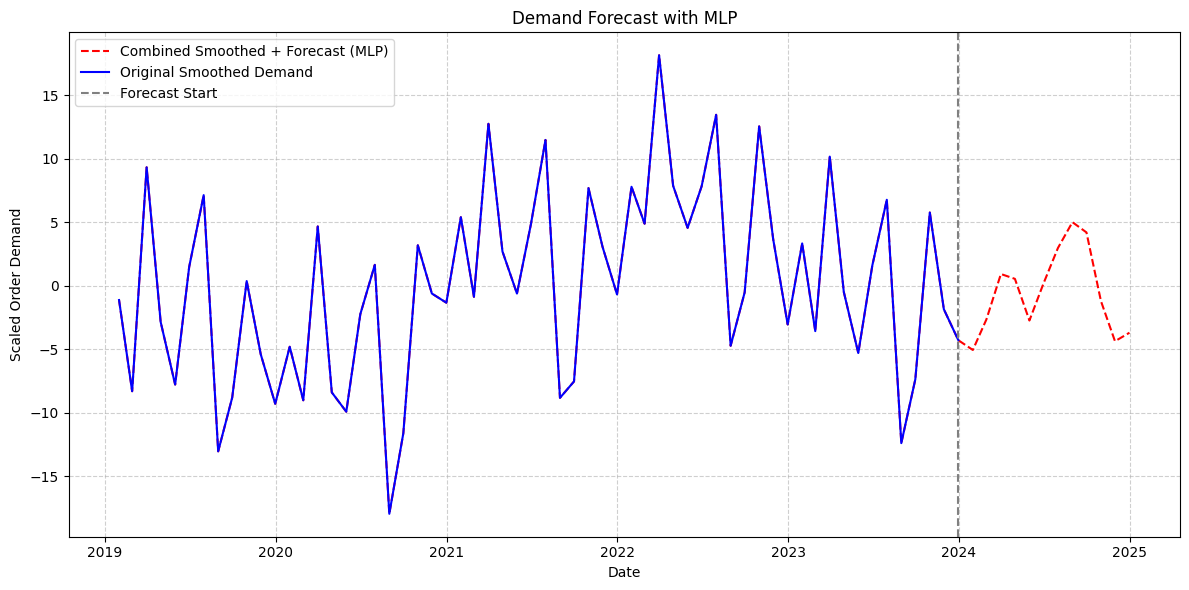

MLP forecast saved as 'mlp_forecast_scaled.csv'.


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use the cleaned dataset and smoothed data
data_grouped = processed_data.groupby('Month')['Order_Demand_Scaled'].sum()

# Assign a datetime index for proper analysis
data_grouped.index = pd.date_range(start='2019-01-01', periods=len(data_grouped), freq='ME')

# Ensure the smoothed data is used
data_smoothed = exp_smoothing_fit.fittedvalues

# Step 9: Prepare Data for MLP
scaler_minmax = MinMaxScaler()
time_series_data = scaler_minmax.fit_transform(data_smoothed.values.reshape(-1, 1))

# Create lagged features
def create_lagged_features(data, lags=3):
    df = pd.DataFrame(data, columns=['value'])
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['value'].shift(lag)
    df.dropna(inplace=True)
    return df

lags = 12  # Using 12 lagged features (1 year of monthly data)
lagged_data = create_lagged_features(time_series_data, lags)

# Split into input (X) and target (y)
X = lagged_data.iloc[:, 1:].values  # Lag features
y = lagged_data.iloc[:, 0].values   # Current value

# Train-Test Split with TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Build and Train the MLP Model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100),  # Smaller architecture
                         activation='relu',
                         solver='adam',
                         max_iter=1500,
                         random_state=42,
                         alpha=0.01)  # L2 regularization
mlp_model.fit(X_train, y_train)

# Evaluate MLP Model
y_pred = mlp_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MLP Mean Squared Error on Test Set: {mse}")

# Forecast Future Values using MLP
forecast_steps = 12
forecast_input = X[-1].reshape(1, -1)  # Start with the last known lag features
mlp_forecast = []

for _ in range(forecast_steps):
    prediction = mlp_model.predict(forecast_input)
    mlp_forecast.append(prediction[0])
    # Update input with the latest prediction
    forecast_input = np.roll(forecast_input, -1)
    forecast_input[0, -1] = prediction[0]

# Inverse transform MLP forecast to original scale
mlp_forecast = scaler_minmax.inverse_transform(np.array(mlp_forecast).reshape(-1, 1)).flatten()
# Inverse transform MLP forecast to original scale

# Generate forecast dates immediately after the last date of data_smoothed
forecast_dates = pd.date_range(start=data_smoothed.index[-1] + pd.DateOffset(months=1),
                               periods=forecast_steps,
                               freq='ME')

# Combine smoothed and forecasted data seamlessly
combined_index = data_smoothed.index.append(forecast_dates)  # Combine smoothed and forecast indices
combined_data = pd.Series(data=np.append(data_smoothed.values, mlp_forecast.flatten()),
                          index=combined_index)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data, label='Combined Smoothed + Forecast (MLP)', color='red', linestyle='--')
plt.plot(data_smoothed.index, data_smoothed, label='Original Smoothed Demand', color='blue', linestyle='-')
plt.axvline(data_smoothed.index[-1], color='grey', linestyle='--', label='Forecast Start')
plt.title('Demand Forecast with MLP')
plt.xlabel('Date')
plt.ylabel('Scaled Order Demand')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Save MLP Forecast
mlp_forecast_df = pd.DataFrame({
    'Month': forecast_dates,
    'MLP_Forecasted_Demand': mlp_forecast.flatten()
})
mlp_forecast_df.to_csv('mlp_forecast_scaled.csv', index=False)
print("MLP forecast saved as 'mlp_forecast_scaled.csv'.")


# **ERROR RATES**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


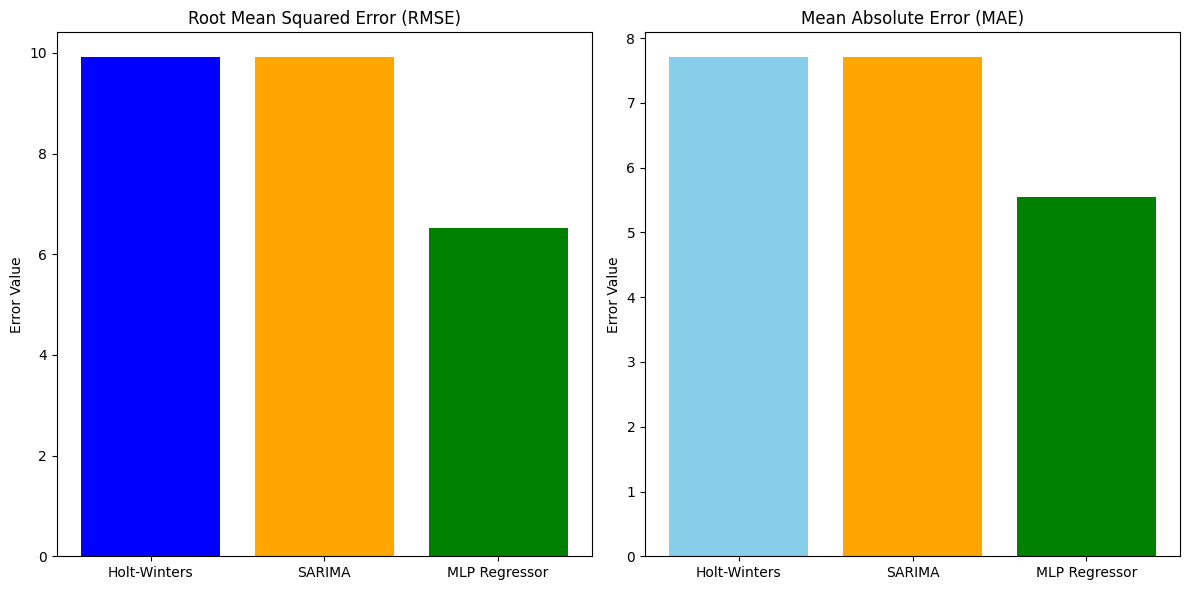

       Algorithm      RMSE       MAE
0   Holt-Winters  9.911833  7.703825
1         SARIMA  9.911835  7.703827
2  MLP Regressor  6.519641  5.543041


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Function to calculate RMSE and MAE
def calculate_errors(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    return rmse, mae

# Ensure predictions and actual data are properly aligned
# Standardize using StandardScaler
scaler = StandardScaler()
processed_data['Order_Demand_Scaled'] = scaler.fit_transform(processed_data[['Order_Demand']])

# Holt-Winters predictions (aligned to the original smoothed data)
holtwinters_predictions = exp_smoothing_fit.fittedvalues
holtwinters_predictions_scaled = scaler.transform(holtwinters_predictions.values.reshape(-1, 1)).flatten()

# SARIMA predictions (ensure alignment and scaling)
sarima_predictions_aligned = sarima_model_fit.fittedvalues  # Replace with SARIMA model variable
sarima_predictions_scaled = scaler.transform(sarima_predictions_aligned.values.reshape(-1, 1)).flatten()

# MLP predictions (from forecast step)
mlp_predictions = mlp_forecast.flatten()  # Ensure this comes from the MLP forecast
mlp_predictions_scaled = scaler.transform(mlp_predictions.reshape(-1, 1)).flatten()

# Ensure actual data is derived consistently
data_actual_processed = processed_data.groupby('Month')['Order_Demand_Scaled'].sum()
data_actual_processed = data_actual_processed[:len(holtwinters_predictions_scaled)]  # Align with predictions

# Recalculate errors on the scaled data
holtwinters_errors = calculate_errors(data_actual_processed, holtwinters_predictions_scaled)
sarima_errors = calculate_errors(data_actual_processed, sarima_predictions_scaled)
mlp_errors = calculate_errors(data_actual_processed[-len(mlp_predictions_scaled):], mlp_predictions_scaled)

# Create DataFrame for error comparison
error_df = pd.DataFrame({
    'Algorithm': ['Holt-Winters', 'SARIMA', 'MLP Regressor'],
    'RMSE': [holtwinters_errors[0], sarima_errors[0], mlp_errors[0]],
    'MAE': [holtwinters_errors[1], sarima_errors[1], mlp_errors[1]]
})

# Visualize and print errors
plt.figure(figsize=(12, 6))

# RMSE Plot
plt.subplot(1, 2, 1)
plt.bar(error_df['Algorithm'], error_df['RMSE'], color=['blue', 'orange', 'green'])
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('Error Value')

# MAE Plot
plt.subplot(1, 2, 2)
plt.bar(error_df['Algorithm'], error_df['MAE'], color=['skyblue', 'orange', 'green'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('Error Value')

plt.tight_layout()
plt.show()

print(error_df)


# **TOP 10 products**

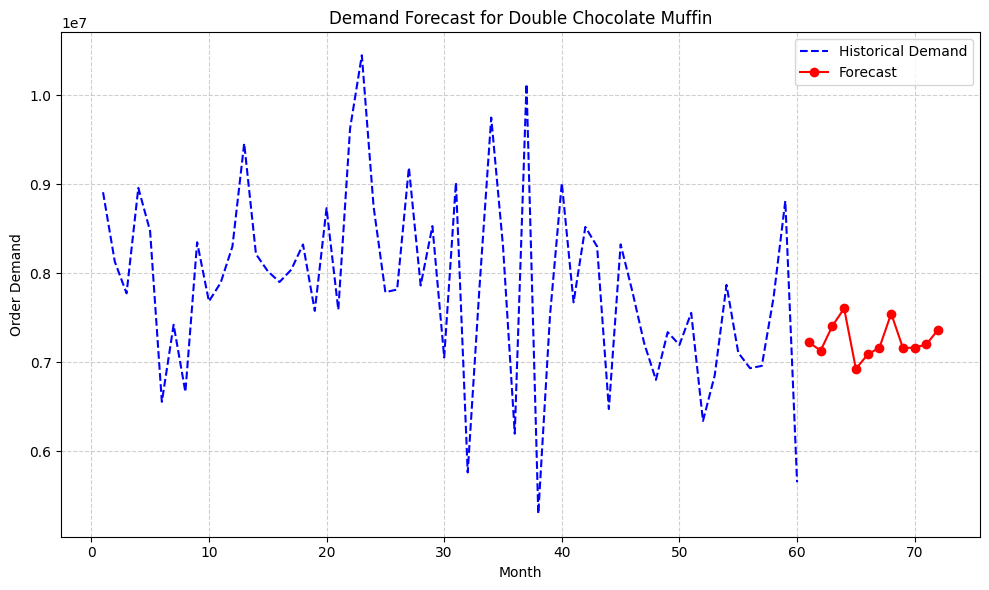

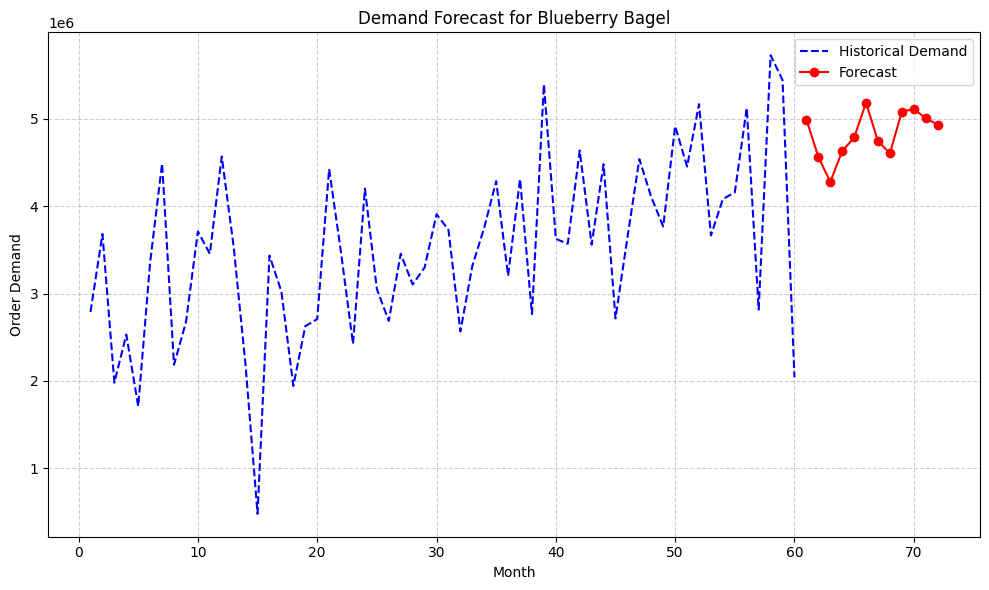

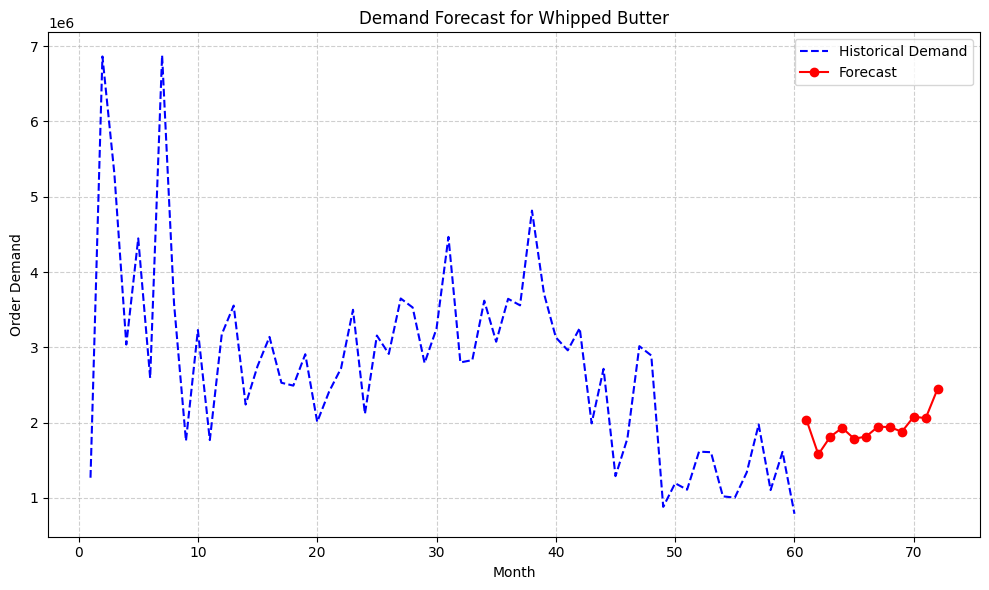

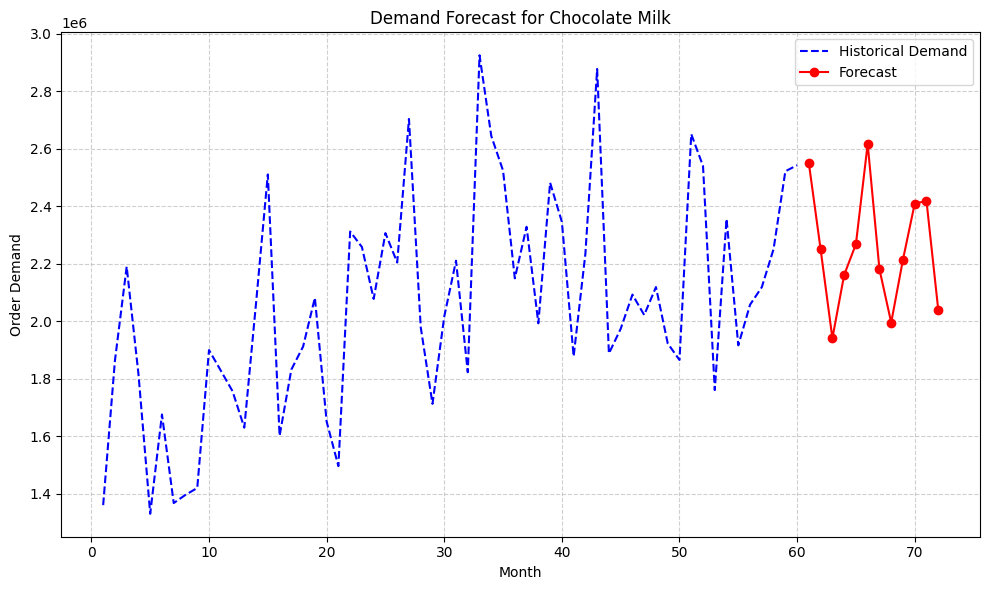

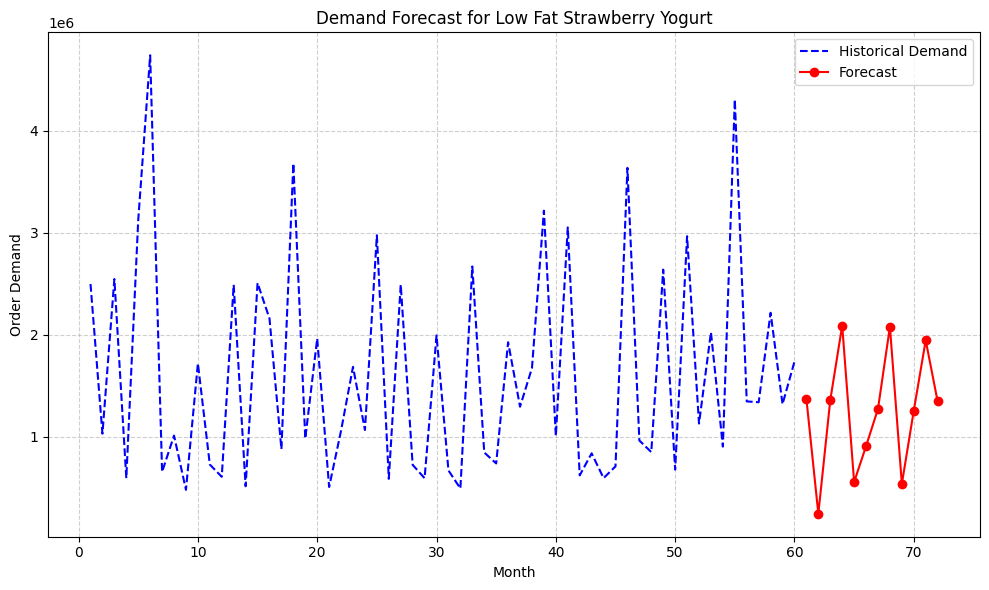

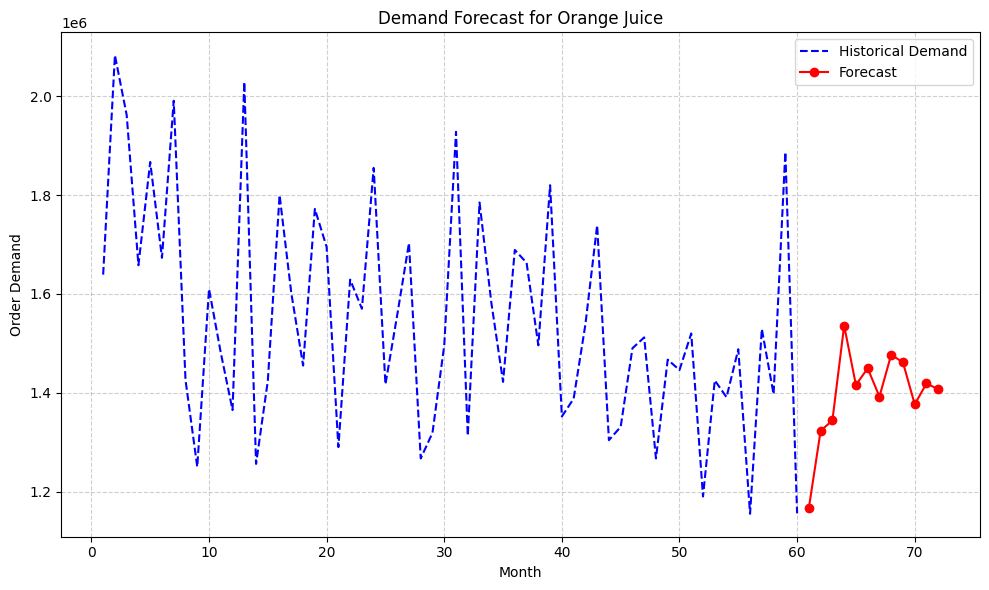

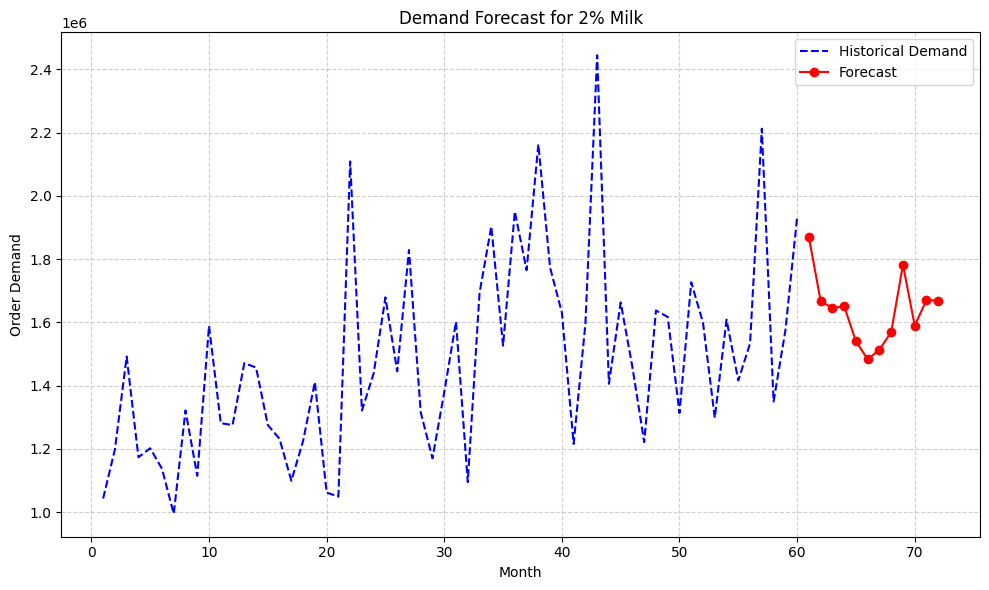

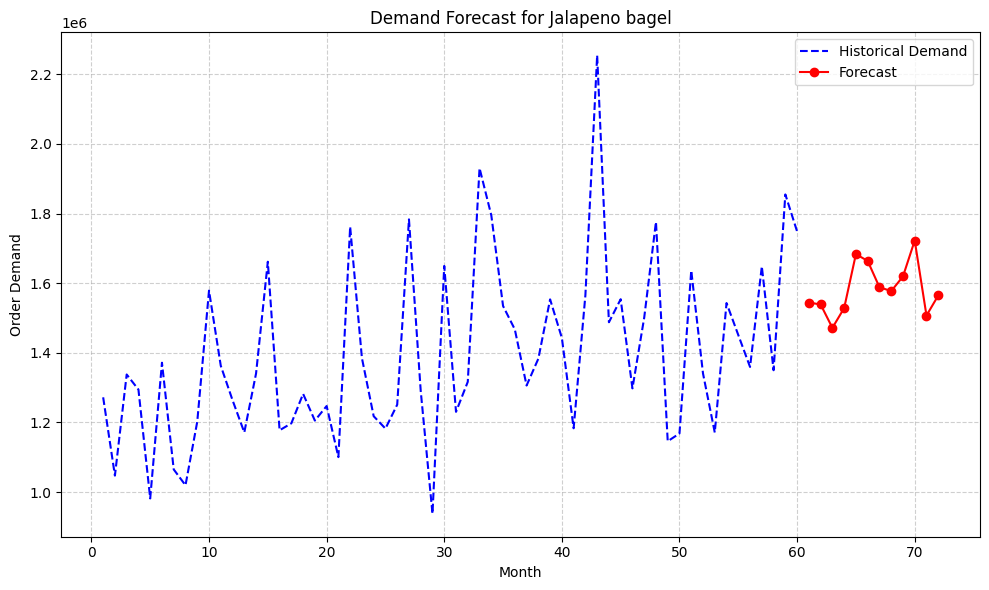

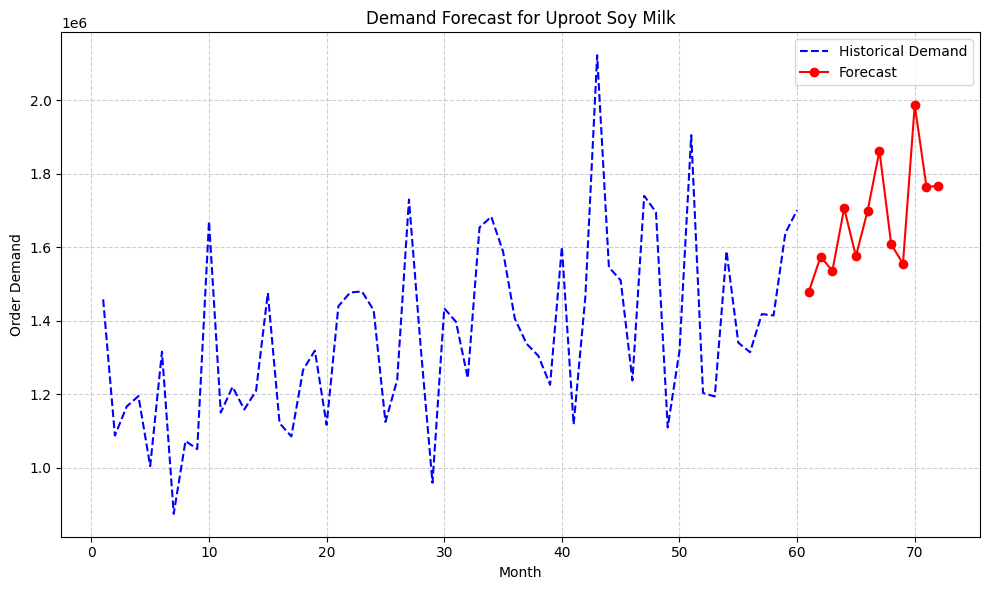

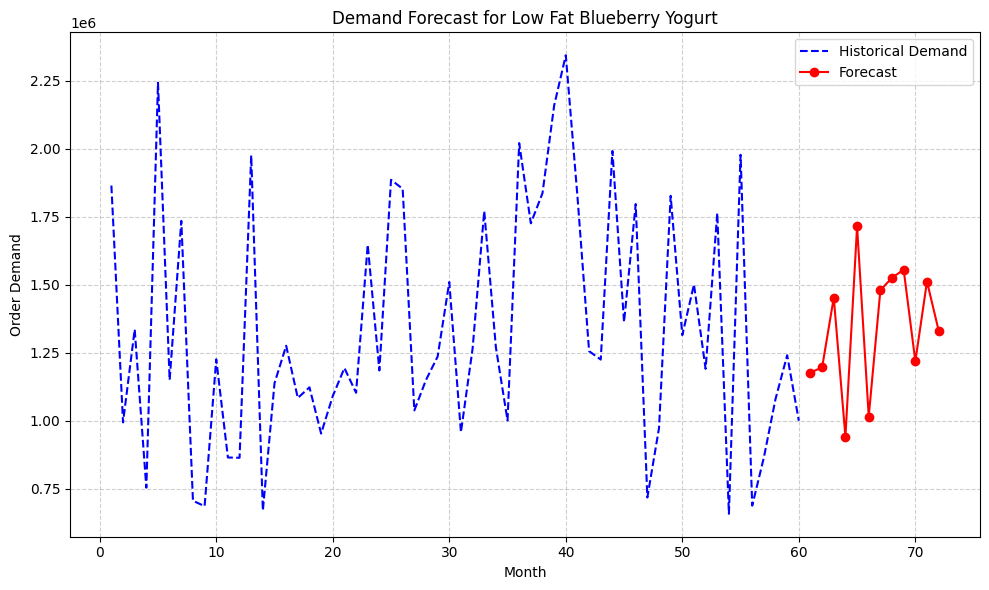

Forecasts and error metrics saved to 'top_10_products_mlp_forecast.csv'.
                Product_Name  \
0    Double Chocolate Muffin   
1            Blueberry Bagel   
2             Whipped Butter   
3             Chocolate Milk   
4  Low Fat Strawberry Yogurt   
5               Orange Juice   
6                    2% Milk   
7             Jalapeno bagel   
8            Uproot Soy Milk   
9   Low Fat Blueberry Yogurt   

                                            Forecast       MSE       MAE  
0  [7226188, 7131176, 7408677, 7605385, 6926521, ...  0.035391  0.147849  
1  [4992449, 4565193, 4276812, 4630482, 4786614, ...  0.069647  0.201984  
2  [2039927, 1578640, 1813142, 1931407, 1786758, ...  0.011385  0.088312  
3  [2550388, 2250488, 1941391, 2161621, 2268893, ...  0.053239  0.178595  
4  [1372542, 245122, 1358825, 2090835, 556455, 90...  0.063852  0.162062  
5  [1167061, 1322920, 1343858, 1535879, 1415642, ...  0.041779  0.123318  
6  [1869840, 1667770, 1645179, 1651016, 1540283, 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neural_network import MLPRegressor

# Step 1: Define a function to train and forecast with MLP for individual products
def train_and_forecast_mlp(product_data, forecast_steps=12, lags=12):
    # Normalize the data using MinMaxScaler
    scaler_minmax = MinMaxScaler()
    scaled_data = scaler_minmax.fit_transform(product_data.values.reshape(-1, 1))

    # Create lagged features
    def create_lagged_features(data, lags=3):
        df = pd.DataFrame(data, columns=['value'])
        for lag in range(1, lags + 1):
            df[f'lag_{lag}'] = df['value'].shift(lag)
        df.dropna(inplace=True)
        return df

    lagged_data = create_lagged_features(scaled_data, lags)

    # Split into input (X) and target (y)
    X = lagged_data.iloc[:, 1:].values  # Lag features
    y = lagged_data.iloc[:, 0].values   # Current value

    # Train-Test Split with TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

    # Build and Train the MLP Model
    mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100),  # Smaller architecture
                             activation='relu',
                             solver='adam',
                             max_iter=1500,
                             random_state=42,
                             alpha=0.01)  # L2 regularization
    mlp_model.fit(X_train, y_train)

    # Evaluate the MLP Model
    y_pred = mlp_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Forecast Future Values using MLP
    forecast_input = X[-1].reshape(1, -1)  # Start with the last known lag features
    mlp_forecast = []

    for _ in range(forecast_steps):
        prediction = mlp_model.predict(forecast_input)
        mlp_forecast.append(prediction[0])
        # Update input with the latest prediction
        forecast_input = np.roll(forecast_input, -1)
        forecast_input[0, -1] = prediction[0]

    # Inverse transform the forecast to the original scale
    mlp_forecast = scaler_minmax.inverse_transform(np.array(mlp_forecast).reshape(-1, 1)).flatten()

    return mlp_forecast, mse, mae

# Step 2: Use data_cleaned and smoothed values for top 10 products
top_10_products = data_cleaned.groupby('Product_Name')['Order_Demand'].sum().nlargest(10).index
forecast_steps = 12  # Next 12 months
results = []

for product in top_10_products:
    product_data = data_cleaned[data_cleaned['Product_Name'] == product]
    product_demand = product_data.groupby('Month')['Order_Demand'].sum()

    # Train and forecast
    forecast, mse, mae = train_and_forecast_mlp(product_demand, forecast_steps=forecast_steps)

    # Round the forecast values
    forecast = [round(value) for value in forecast]

    # Save results
    results.append({
        'Product_Name': product,
        'Forecast': forecast,
        'MSE': mse,
        'MAE': mae
    })

    # Plot forecast
    plt.figure(figsize=(10, 6))
    plt.plot(product_demand.index, product_demand.values, label="Historical Demand", linestyle='--', color='blue')
    plt.plot(range(product_demand.index[-1] + 1, product_demand.index[-1] + 1 + forecast_steps), forecast,
             label="Forecast", marker='o', color='red')
    plt.title(f"Demand Forecast for {product}")
    plt.xlabel("Month")
    plt.ylabel("Order Demand")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Step 3: Create and Save a Results DataFrame
results_df = pd.DataFrame(results)
results_df.to_csv('top_10_products_mlp_forecast.csv', index=False)

print("Forecasts and error metrics saved to 'top_10_products_mlp_forecast.csv'.")
print(results_df)
